<a href="https://colab.research.google.com/github/Joniald/Colaboratory/blob/main/mnist_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mnist data classification

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X = mnist.data
Y = mnist.target
print(X.shape, Y.shape)

(70000, 784) (70000,)


5


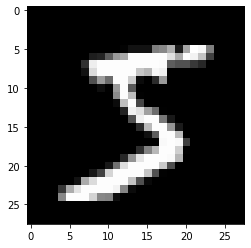

In [4]:
img = X[0]
imag = img.reshape((28,28))
plt.imshow(imag, cmap='gray', vmin=0, vmax=255)
print(Y[0])

In [5]:
print(type(Y[0]))
Y = Y.astype(np.uint8)
print(type(Y[0]))

<class 'str'>
<class 'numpy.uint8'>


In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

## Training a Binary Classifier

In [7]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

## SGDClassifier

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_cls = SGDClassifier(random_state=42)
sgd_cls.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
y_predict_01 = sgd_cls.predict([X_train[0]])
y_predict_02 = sgd_cls.predict([X_train[10]])
print(y_predict_01, y_predict_02)

[ True] [False]


In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(sgd_cls, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_cls, X_train, y_train_5, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [14]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311)

## RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

In [16]:
y_pro_forest = tf.round(y_probas_forest[:,1])
y_pro_forest

<tf.Tensor: shape=(60000,), dtype=float64, numpy=array([1., 0., 0., ..., 1., 0., 0.])>

In [17]:
print(confusion_matrix(y_train_5, y_pro_forest))
print(precision_score(y_train_5, y_pro_forest), recall_score(y_train_5, y_pro_forest))

[[54534    45]
 [  725  4696]]
0.9905083315756169 0.8662608374838591


In [18]:
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
forest_test_pre = forest_clf.predict(X_test)

In [20]:
print(confusion_matrix(y_test_5, forest_test_pre))
print(precision_score(y_test_5, forest_test_pre), recall_score(y_test_5, forest_test_pre))

[[9103    5]
 [ 118  774]]
0.993581514762516 0.8677130044843049


## Multiclass Classification

In [25]:
X_train.max(), X_train.min()

(255.0, 0.0)

In [26]:
x_train_svc = X_train/255.0
x_test_svc = X_test/255.0
x_train_svc.max(), x_test_svc.max()

(1.0, 1.0)

## SVMClassifier

In [27]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train_svc, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
print(svc_model.predict([x_train_svc[10]]))
print(y_train[10])
des_f = svc_model.decision_function([x_train_svc[10]])
print(des_f)
print(np.argmax(des_f))

[3]
3
[[ 2.73719174  6.20651629  3.81372559  9.32009109  0.69223349  6.26207869
  -0.31019599  1.69984884  8.29382546  6.23989726]]
3


In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc_model, x_train_svc, y_train, cv=3, scoring="accuracy")

array([0.977 , 0.9738, 0.9739])

In [47]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svc_model, x_train_svc, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)


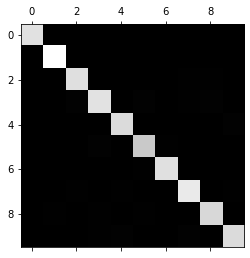

In [48]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()